In [210]:
import matplotlib.pyplot as plt
import seaborn as sns 

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [211]:
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [212]:
data = df[df.columns[:]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

In [213]:
data['MEDV'] = boston_dataset.target

In [214]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734,22.4
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355,20.6
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076,23.9
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446,22.0


<AxesSubplot:>

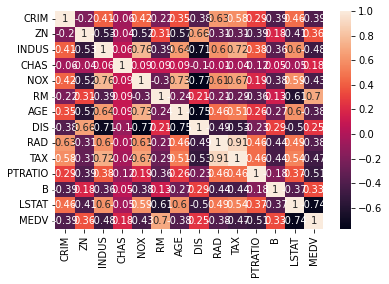

In [215]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [216]:
a = data['LSTAT'], data['RM']

#X = np.array([data['LSTAT'], data['RM']]).T
X = data.drop('MEDV', axis=1).to_numpy()
Y = data['MEDV'].to_numpy()

X.shape

(506, 13)

In [217]:
Y.shape

(506,)

In [218]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

import torch
X_train = torch.tensor(x_train)#, device = device)
X_test = torch.tensor(x_test)#, device = device)
Y_train = torch.tensor(y_train.reshape(-1, 1))#, device = device)
Y_test = torch.tensor(y_test.reshape(-1, 1))#,  device = device)

import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [219]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)

train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

#подберите параметры 
inputDim = X_train.shape[1]
outputDim = 1
learningRate = 0.05
num_epochs = 10

model = linearRegression(inputDim,outputDim)

In [220]:
x_train.shape

(404, 13)

In [221]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [222]:
error = []

In [223]:


for epoch in range(num_epochs):
    e = []
    for x, y in train_iter:
        output = model(x.float())
        l = criterion(output, y.float())
        e.append(l.item())
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch: ', epoch,'loss', np.mean(e))


epoch:  0 loss 94.98075133998219
epoch:  1 loss 24.991755543685542
epoch:  2 loss 23.286359693945908
epoch:  3 loss 23.903489368717846
epoch:  4 loss 25.42298087841127
epoch:  5 loss 24.64518991330775
epoch:  6 loss 24.876439141064154
epoch:  7 loss 24.830894656297637
epoch:  8 loss 22.99138466904803
epoch:  9 loss 25.322870929066728


In [224]:
with torch.no_grad(): 
    predicted = model(X_test.float())

In [225]:
predicted

tensor([[33.8476],
        [22.3054],
        [29.4708],
        [26.6989],
        [19.2147],
        [37.1672],
        [19.1690],
        [26.4762],
        [17.7827],
        [20.8995],
        [19.9804],
        [16.7664],
        [18.0895],
        [30.7963],
        [17.7633],
        [18.8203],
        [20.5183],
        [31.3936],
        [18.5111],
        [24.0737],
        [20.8711],
        [29.9554],
        [26.3757],
        [28.9483],
        [33.4475],
        [24.7674],
        [25.5603],
        [16.5958],
        [17.1532],
        [23.4296],
        [23.5421],
        [25.8316],
        [30.9002],
        [20.3564],
        [21.3506],
        [29.9855],
        [24.5823],
        [26.5492],
        [16.9262],
        [31.4685],
        [21.8100],
        [17.3324],
        [27.8865],
        [35.8700],
        [11.8749],
        [18.3045],
        [17.8020],
        [23.5052],
        [16.9828],
        [32.7373],
        [26.3509],
        [21.3843],
        [17.

In [226]:
Y_train

tensor([[48.5000],
        [17.1000],
        [23.1000],
        [28.4000],
        [18.9000],
        [13.0000],
        [17.2000],
        [24.1000],
        [18.5000],
        [21.8000],
        [13.3000],
        [23.0000],
        [14.1000],
        [23.9000],
        [24.0000],
        [17.2000],
        [21.5000],
        [19.1000],
        [20.8000],
        [36.0000],
        [20.1000],
        [ 8.7000],
        [13.6000],
        [22.0000],
        [22.2000],
        [21.1000],
        [13.4000],
        [17.4000],
        [20.1000],
        [10.2000],
        [23.1000],
        [10.2000],
        [13.1000],
        [14.3000],
        [14.5000],
        [ 7.2000],
        [19.6000],
        [20.6000],
        [22.7000],
        [26.4000],
        [ 7.5000],
        [20.3000],
        [50.0000],
        [ 8.5000],
        [20.3000],
        [16.1000],
        [22.0000],
        [19.6000],
        [10.2000],
        [23.2000],
        [35.2000],
        [25.0000],
        [36.

1) Задание 1 Посчитайте MSE RMSE для тестовых данных, напишите код который 

In [227]:
from sklearn.metrics import mean_squared_error as mse

MSError = mse(Y_test, predicted)
MSError

79.336244191855

In [228]:
RMSError = mse(Y_test, predicted, squared=False)
RMSError

8.90708954663952

2. Задание 2. Основываясь на коде предоставленном выше постройте Логистическую регрессию, выведите precision, recoll, accuracy, confuxion matrix. Сравните результат с Random forest и SVM Model. 

In [229]:
import pandas as pd
url='https://drive.google.com/file/d/1LfY42F9bIbAn2s7b8zT1gsXFBceLBU10/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [230]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [231]:
data = df[df.columns[:]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std() if x.name != 'Outcome' else x
)

<AxesSubplot:>

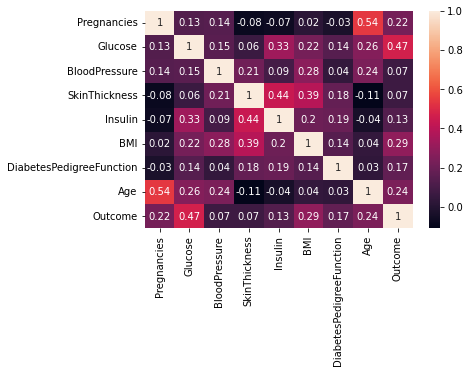

In [232]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [233]:
X = data.drop('Outcome', axis=1).to_numpy()
Y = data['Outcome'].to_numpy()

X.shape

(768, 8)

In [234]:
Y.shape

(768,)

In [235]:
class LogisticRegreession(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LogisticRegreession, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        self.logistic = torch.nn.Sigmoid()
    
    def forward(self, x):
        out = self.logistic(self.linear(x))
        return out

In [236]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

X_train = torch.tensor(x_train)#, device = device)
X_test = torch.tensor(x_test)#, device = device)
Y_train = torch.tensor(y_train.reshape(-1, 1))#, device = device)
Y_test = torch.tensor(y_test.reshape(-1, 1))#,  device = device)

In [237]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

inputDim = X_train.shape[1]
outputDim = 1
learningRate = 0.05
num_epochs = 10

model = LogisticRegreession(inputDim,outputDim)

In [238]:
x_train.shape

(614, 8)

In [239]:
criperion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [240]:
error = []

In [241]:
for epoch in range(num_epochs):
    e = []
    for x, y in train_iter:
        output = model(x.float())
        l = criperion(output, y.float())
        e.append(l.item())
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch: ', epoch,'loss', np.mean(e))

epoch:  0 loss 0.6225307579002073
epoch:  1 loss 0.5160750352567242
epoch:  2 loss 0.4946453345398749
epoch:  3 loss 0.48276344903053775
epoch:  4 loss 0.48364621040321165
epoch:  5 loss 0.4792346048258966
epoch:  6 loss 0.4774821770768012
epoch:  7 loss 0.47553806727932346
epoch:  8 loss 0.47579460567043674
epoch:  9 loss 0.4778640803790862


In [242]:
with torch.no_grad(): 
    predicted = model(X_test.float())
    # predicted = model(X_test.float()).round()

In [243]:
predicted

tensor([[0.8646],
        [0.3900],
        [0.6119],
        [0.0525],
        [0.0774],
        [0.6298],
        [0.9018],
        [0.4800],
        [0.5970],
        [0.3035],
        [0.8791],
        [0.1850],
        [0.1300],
        [0.2572],
        [0.8204],
        [0.0389],
        [0.2746],
        [0.0732],
        [0.0548],
        [0.4128],
        [0.6757],
        [0.1841],
        [0.2921],
        [0.9351],
        [0.9563],
        [0.1243],
        [0.0595],
        [0.2414],
        [0.4049],
        [0.8492],
        [0.1890],
        [0.8169],
        [0.8017],
        [0.1341],
        [0.2506],
        [0.3152],
        [0.9000],
        [0.1485],
        [0.1002],
        [0.2650],
        [0.0357],
        [0.2680],
        [0.0545],
        [0.4176],
        [0.1920],
        [0.4204],
        [0.7207],
        [0.0240],
        [0.1410],
        [0.0564],
        [0.0391],
        [0.0708],
        [0.1466],
        [0.0374],
        [0.2193],
        [0

In [244]:
Y_train

tensor([[0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],

In [245]:
roundedP = predicted.round()

In [251]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(precision_score(Y_test, roundedP))
print(recall_score(Y_test, roundedP))
print(accuracy_score(Y_test, roundedP))
print(confusion_matrix(Y_test, roundedP))

0.8181818181818182
0.6206896551724138
0.8051948051948052
[[88  8]
 [22 36]]
